# 🟢 GlucoTrack – Beginner Track

## ✅ Week 1: Exploratory Data Analysis (EDA)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

### 📦 1. Data Integrity & Structure

Q: Are there any missing, duplicate, or incorrectly formatted entries in the dataset?  
A:  No missing values; Number of duplicate rows: 23899, but the dataset has removed patient id so it might be different patients having the same indicators ； no incorrectly formatted entries.


In [ ]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
# Check duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 23899


Q: Are all data types appropriate (e.g., numeric, categorical)?  
A:  GenHlth:categorical(ordinal)	MentHlth:numeric	PhysHlth:numeric;	BMI:numeric 	Others:categorical(nominal)	

In [34]:
# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [36]:
# Check for incorrectly formatted values
# For categorical/encoded columns, check unique values
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\n{col} - Unique values: {sorted(unique_vals)}")



Diabetes_012 - Unique values: [np.float64(0.0), np.float64(1.0), np.float64(2.0)]

HighBP - Unique values: [np.float64(0.0), np.float64(1.0)]

HighChol - Unique values: [np.float64(0.0), np.float64(1.0)]

CholCheck - Unique values: [np.float64(0.0), np.float64(1.0)]

BMI - Unique values: [np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(29.0), np.float64(30.0), np.float64(31.0), np.float64(32.0), np.float64(33.0), np.float64(34.0), np.float64(35.0), np.float64(36.0), np.float64(37.0), np.float64(38.0), np.float64(39.0), np.float64(40.0), np.float64(41.0), np.float64(42.0), np.float64(43.0), np.float64(44.0), np.float64(45.0), np.float64(46.0), np.float64(47.0), np.float64(48.0), np.float64(49.0), np.float64(50.0), np.floa

In [ ]:
# For 'Diabetes_012', expected values are 0, 1, 2
invalid_diabetes_vals = df[~df['Diabetes_012'].isin([0, 1, 2])]
print("\nInvalid Diabetes_012 entries:")
print(invalid_diabetes_vals)


Invalid Diabetes_012 entries:
Empty DataFrame
Columns: [Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]
Index: []

[0 rows x 22 columns]


In [ ]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("\nNumeric columns:", numeric_cols)

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print("\nNon-numeric columns:", non_numeric_cols)


Numeric columns: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Non-numeric columns: []


Q: Did you detect any constant, near-constant, or irrelevant features?  
A:  No constant features; Near-constant features: CholCheck, Stroke, and AnyHealthcare, all more than 95% dominance, 
Possible irrelavant features: 
AnyHealthcare           0.015410
Sex                     0.031040
NoDocbcCost             0.035436

In [ ]:
# Detect constant features 
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Constant features:", constant_features)

Constant features: []


In [ ]:
# Detect near-constant features 
# Assuming one value dominating, the threshold is set to 95%. 
near_constant_features = []
threshold = 0.95
for col in df.columns:
    top_freq = df[col].value_counts(normalize=True).iloc[0]
    if top_freq >= threshold and df[col].nunique() > 1:
        near_constant_features.append((col, top_freq))
print("\nNear-constant features (value, frequency):", near_constant_features)


Near-constant features (value, frequency): [('CholCheck', np.float64(0.9626695048880479)), ('Stroke', np.float64(0.959429202144434)), ('AnyHealthcare', np.float64(0.9510525070955534))]


In [ ]:
# Check irrelevant features: using correlation with target
correlation_with_target = df.corr()['Diabetes_012'].abs().sort_values()
print("\nCorrelation with target (lowest to highest):")
print(correlation_with_target)


Correlation with target (lowest to highest):
AnyHealthcare           0.015410
Sex                     0.031040
NoDocbcCost             0.035436
Fruits                  0.042192
HvyAlcoholConsump       0.057882
Veggies                 0.058972
Smoker                  0.062914
CholCheck               0.067546
MentHlth                0.073507
Stroke                  0.107179
PhysActivity            0.121947
Education               0.130517
Income                  0.171483
PhysHlth                0.176287
HeartDiseaseorAttack    0.180272
Age                     0.185026
HighChol                0.209085
DiffWalk                0.224239
BMI                     0.224379
HighBP                  0.271596
GenHlth                 0.302587
Diabetes_012            1.000000
Name: Diabetes_012, dtype: float64


### 🎯 2. Target Variable Assessment

Q: What is the distribution of `Diabetes_binary`?  
A:  
84% of the population in this dataset had No diabetes
14% of the population in this dataset had Prediabetes
2% of the population in this dataset had Diabetes

Q: Is there a class imbalance? If so, how significant is it?  
A:  class 0 (no diabetes) dominates in this dataset, with 84% of the samples. 

Q: How might this imbalance influence your choice of evaluation metrics or model strategy?  
A:  Less accuracy?
In this case, accuracy alone can't get a complete picture of a model's performance in the face of imbalance. We might need to focus on minority class performance - how sensitive the model performs on the minority class.

Counts:
 Diabetes_012
0.0    213703
1.0      4631
2.0     35346
Name: count, dtype: int64

Percentages:
 Diabetes_012
0.0    84.241170
1.0     1.825528
2.0    13.933302
Name: proportion, dtype: float64


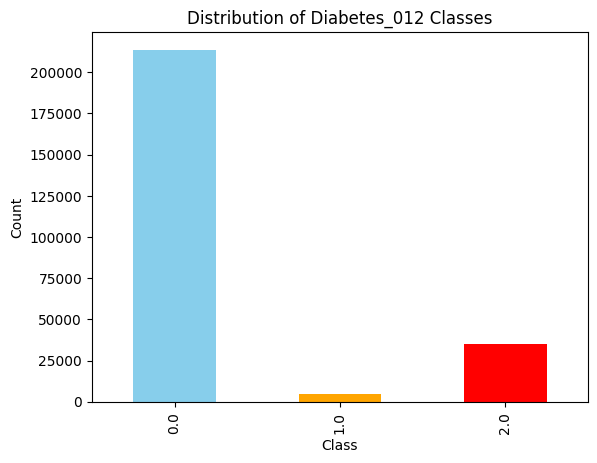

In [39]:
# Distribution of Diabetes_012
distribution = df['Diabetes_012'].value_counts().sort_index()

# Percentage distribution
percentage_distribution = df['Diabetes_012'].value_counts(normalize=True).sort_index() * 100

print("Counts:\n", distribution)
print("\nPercentages:\n", percentage_distribution)

# Visualization
import matplotlib.pyplot as plt
distribution.plot(kind='bar', color=['skyblue', 'orange', 'red'])
plt.title('Distribution of Diabetes_012 Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### 📊 3. Feature Distribution & Quality

Q: Which numerical features are skewed or contain outliers?  
A: Most skewed features: Stroke; CholCheck; HeartDiseaseorAttack; AnyHealthcare


Q: Did any features contain unrealistic or problematic values?  
A:  No impossible negative values. Some BMI extremes but still plausible for real-world obesity cases.

Q: What transformation methods (if any) might improve these feature distributions?  
A:  Log / Square-root transformation?

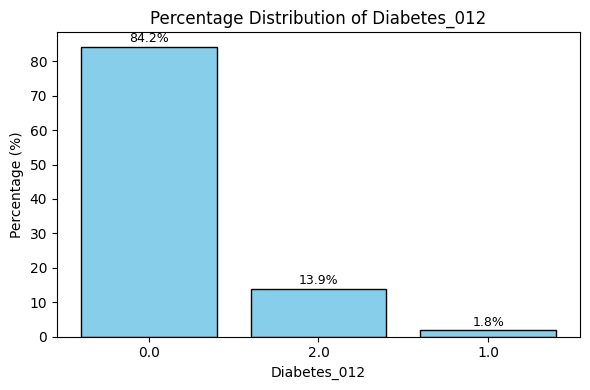

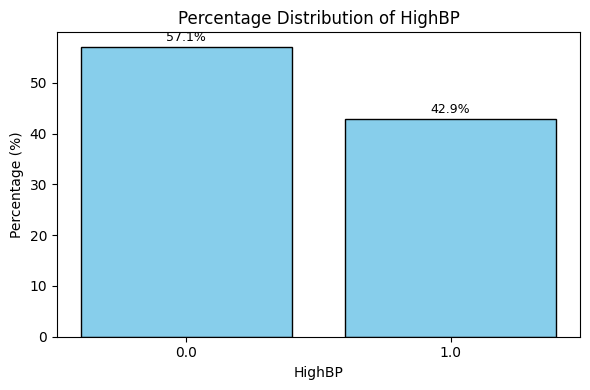

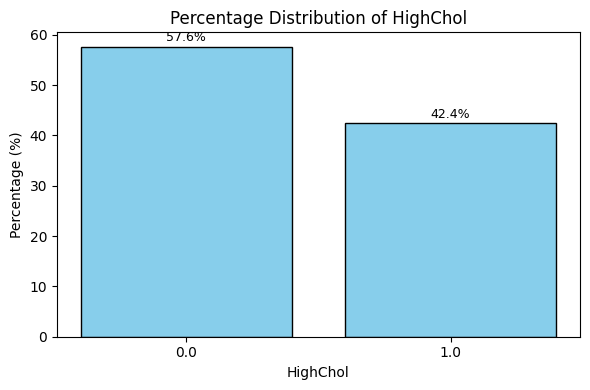

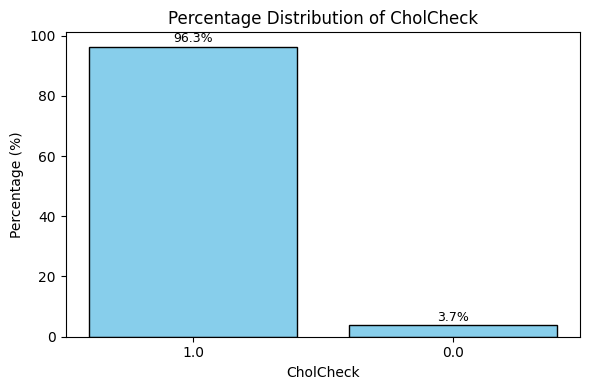

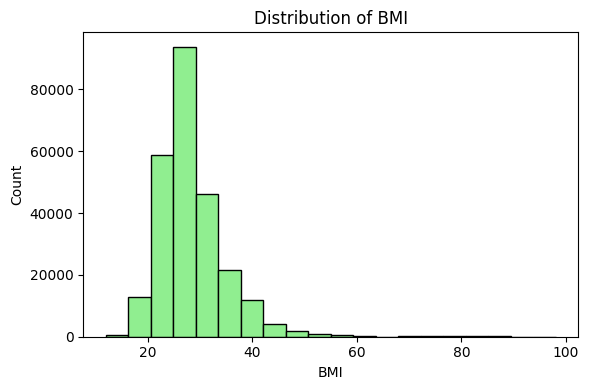

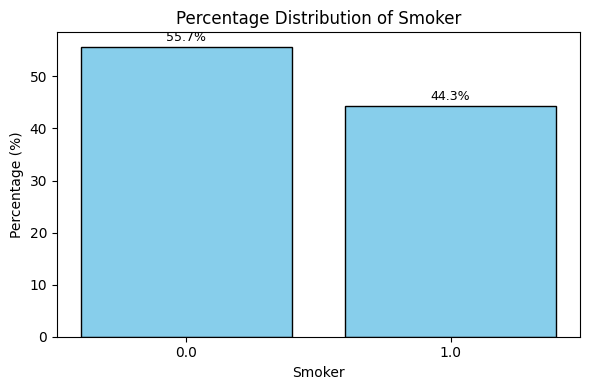

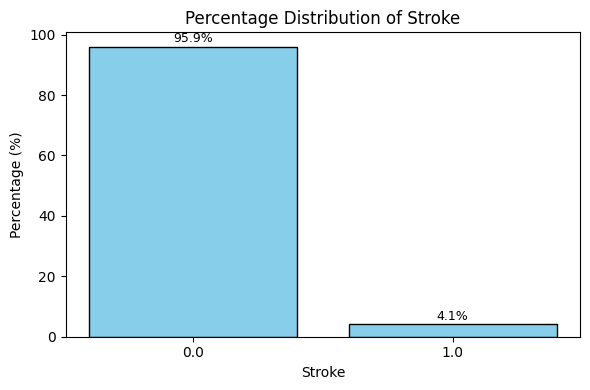

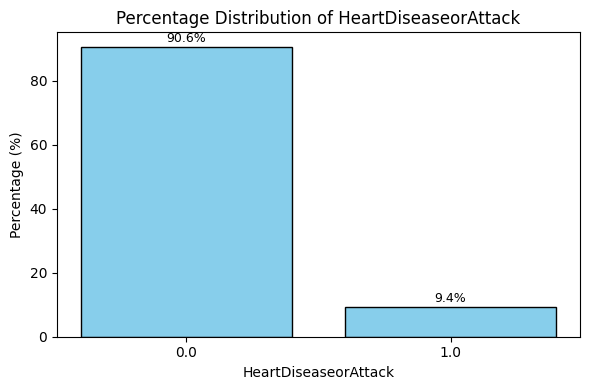

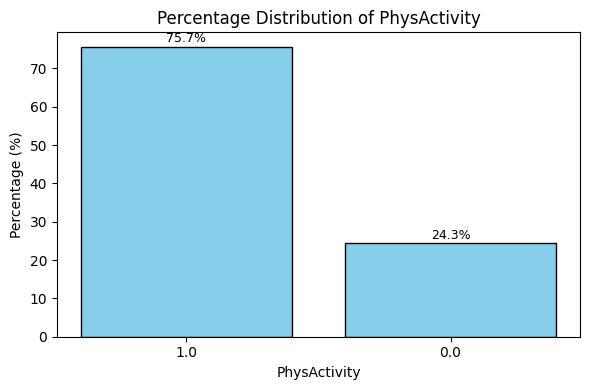

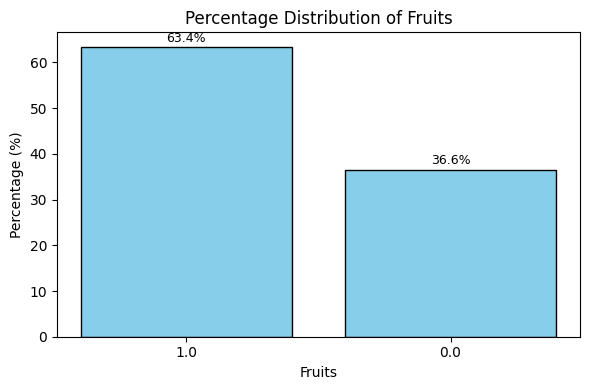

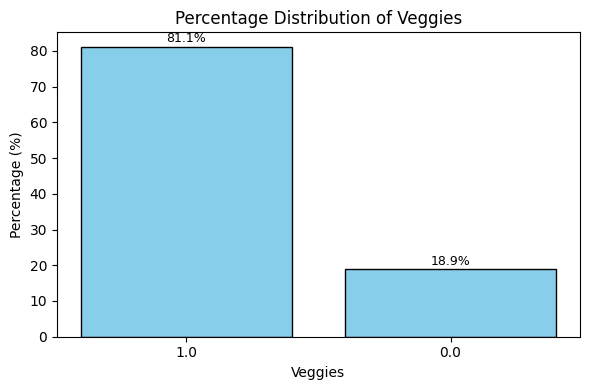

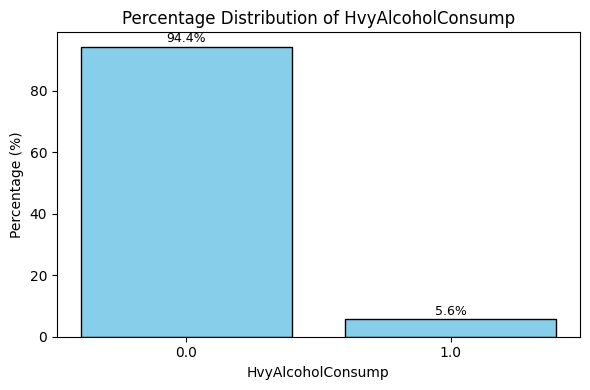

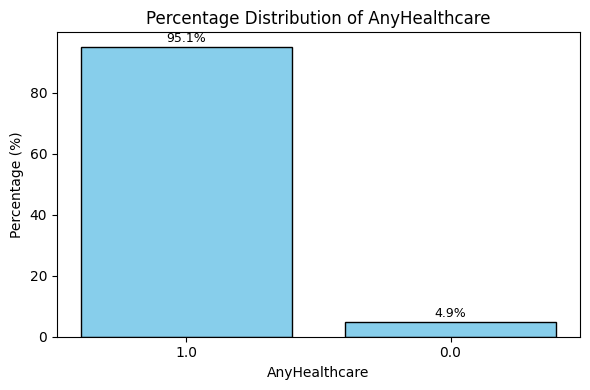

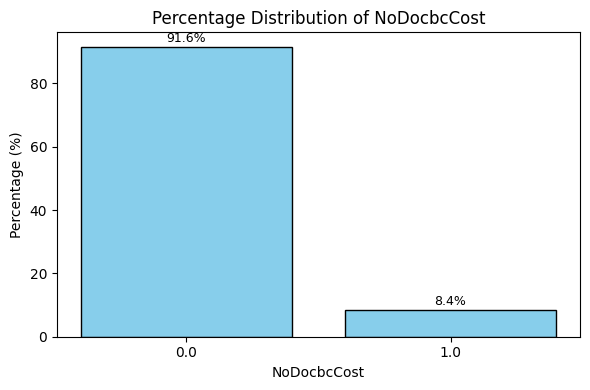

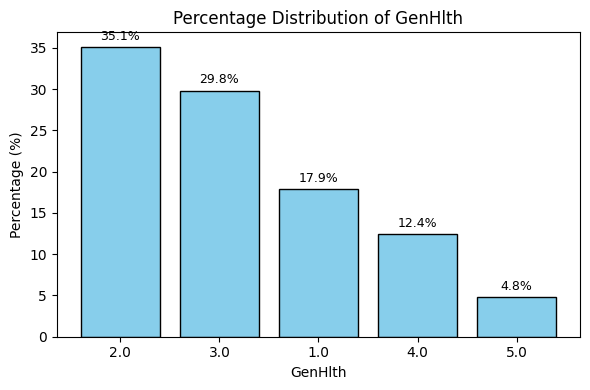

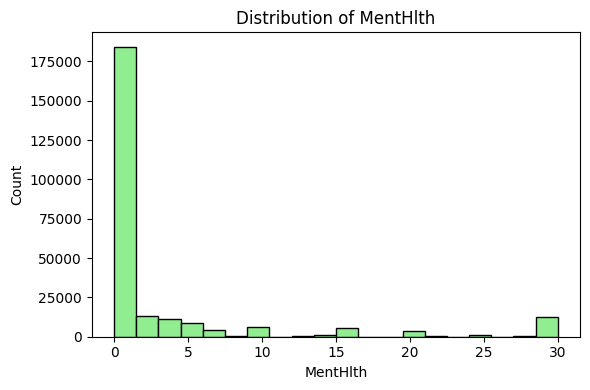

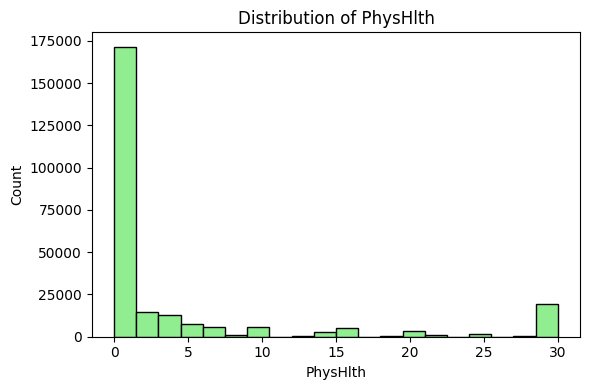

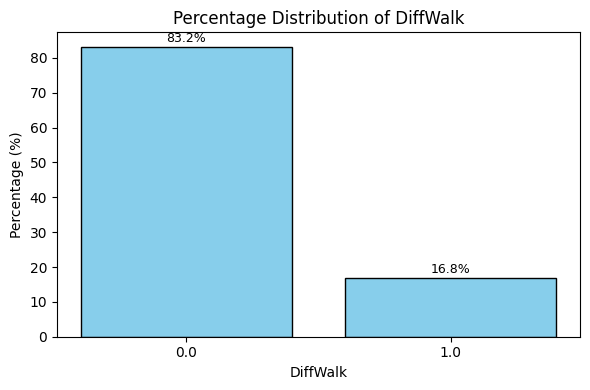

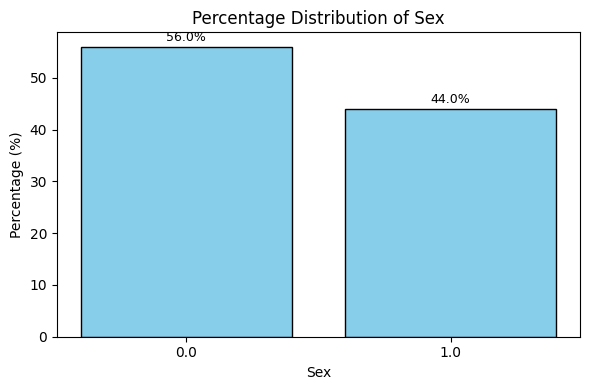

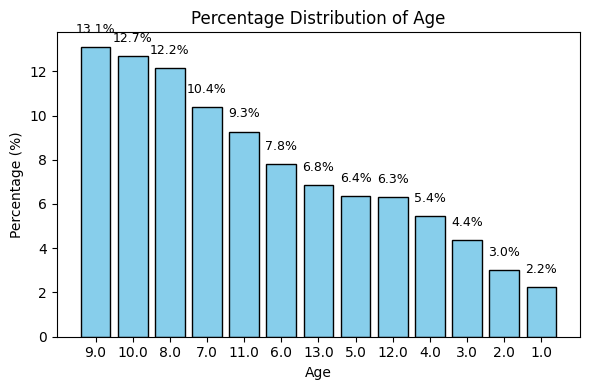

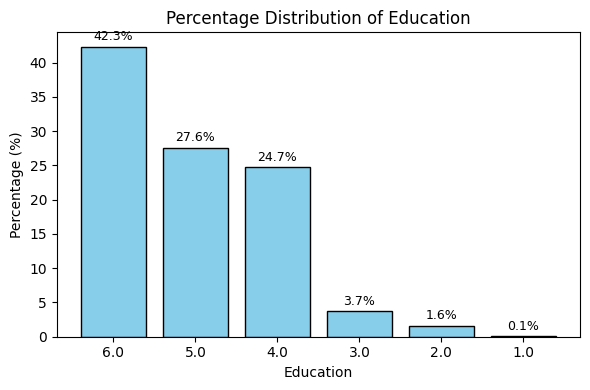

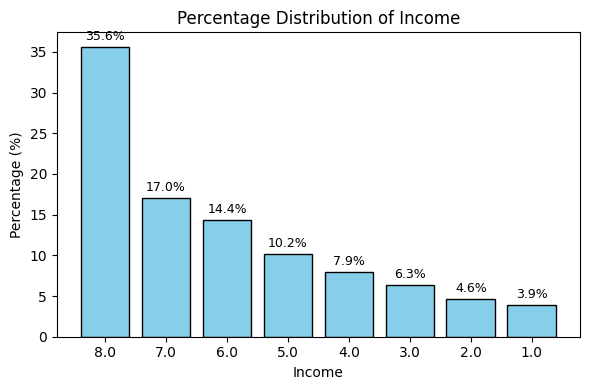

In [42]:
# Define which features are continuous vs categorical based on your mapping
continuous_features = ['BMI', 'MentHlth', 'PhysHlth']
categorical_features = [
    'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
    'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
]

# Loop through features
for col in df.columns:
    if col in categorical_features:
        # Calculate percentage distribution
        percentages = df[col].value_counts(normalize=True) * 100
        categories = percentages.index.astype(str)
        
        # Plot
        plt.figure(figsize=(6,4))
        bars = plt.bar(categories, percentages, color='skyblue', edgecolor='black')
        plt.title(f'Percentage Distribution of {col}')
        plt.ylabel('Percentage (%)')
        plt.xlabel(col)
        
        # Add data labels
        for bar, pct in zip(bars, percentages):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                     f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
    else:
        # Continuous features can be plotted as histograms
        plt.figure(figsize=(6,4))
        plt.hist(df[col], bins=20, color='lightgreen', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Count')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

### 📈 4. Feature Relationships & Patterns

Q: Which categorical features (e.g., `GenHealth`, `PhysicalActivity`, `Smoking`) show visible patterns in relation to `Diabetes_binary`?  
A:  HighBP & HighChol: show higher rates among diabetics.

Q: Are there any strong pairwise relationships or multicollinearity between features?  
A:  Physicial Health & Gen Health & Difficult Walking

Q: What trends or correlations stood out during your analysis?  
A:  Class Imbalance in Diabetes_012: The majority of people are in class 0 (no diabetes), with far fewer in class 1 (prediabetes) and 2 (diabetes).
Health Conditions Strongly Associated with Diabetes: Features like HighBP, HighChol, show clear patterns where higher proportions of people in diabetes classes (1 and 2) report these conditions.

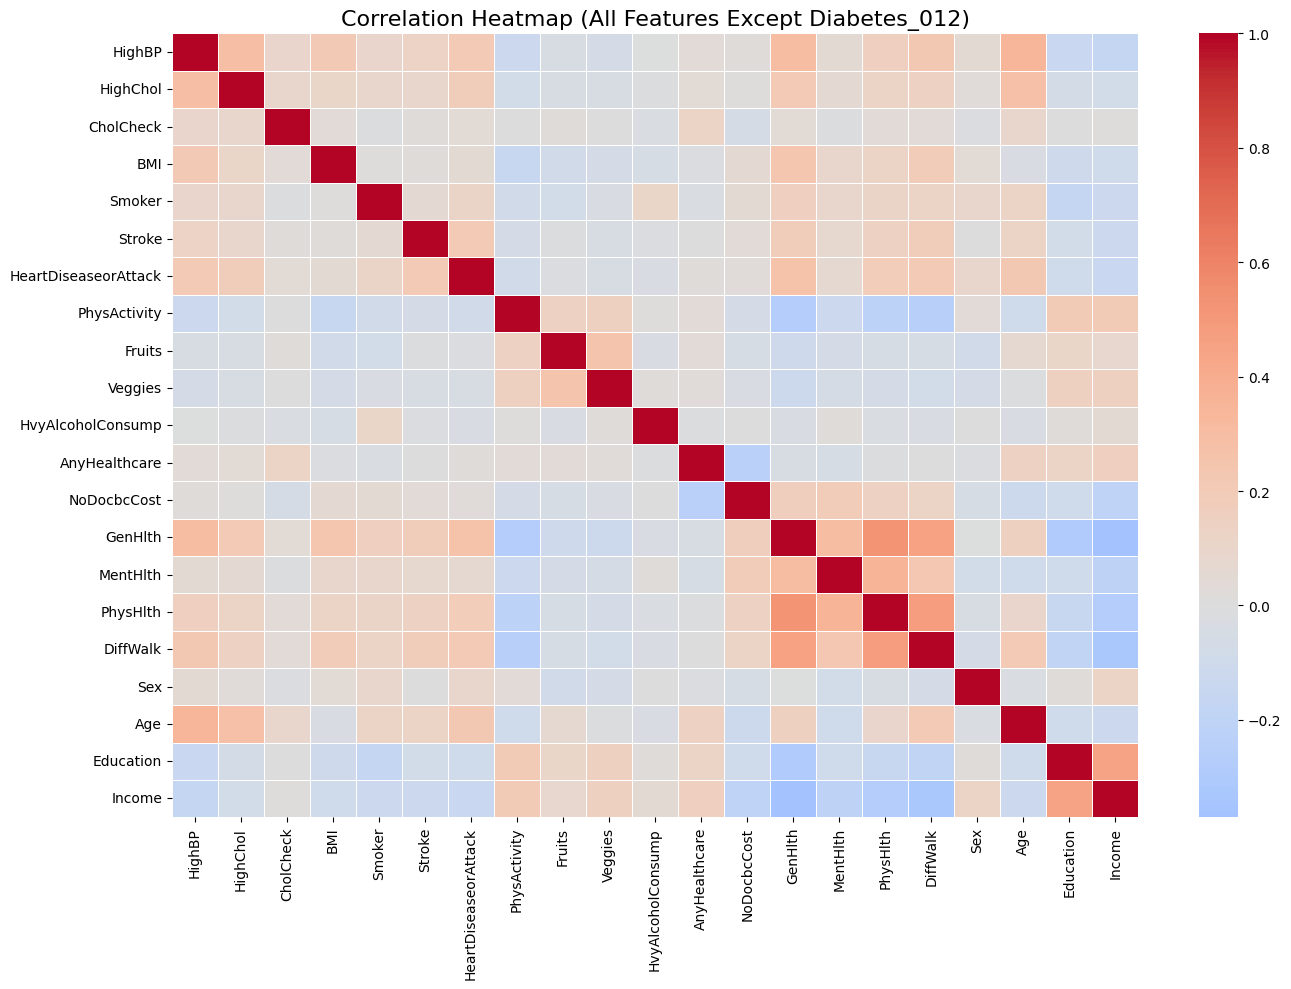

In [43]:
# Compute correlation matrix
features_only = df.drop(columns=['Diabetes_012'])
corr_matrix = features_only.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix, 
    annot=False,        # Change to True if you want correlation numbers on cells
    cmap='coolwarm', 
    center=0, 
    linewidths=0.5
)
plt.title('Correlation Heatmap (All Features Except Diabetes_012)', fontsize=16)
plt.tight_layout()
plt.show()

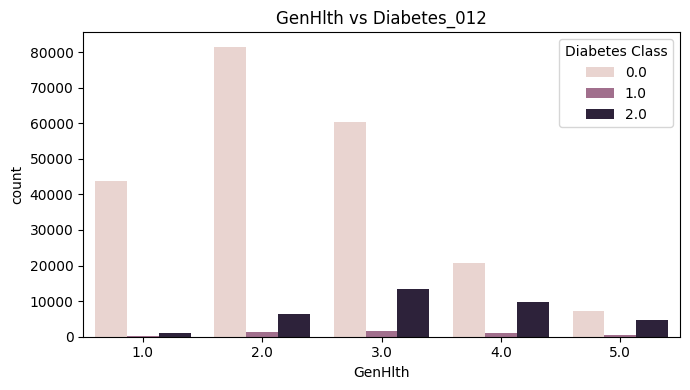

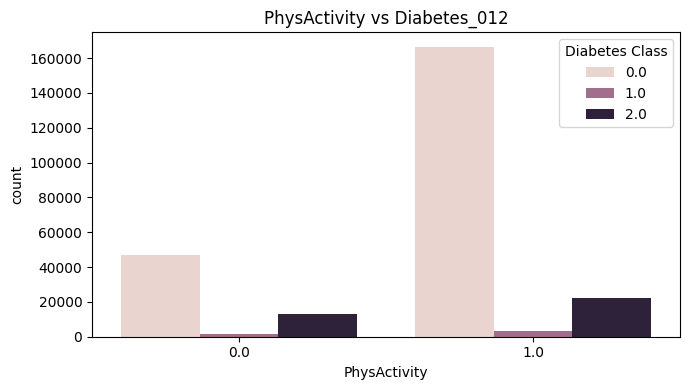

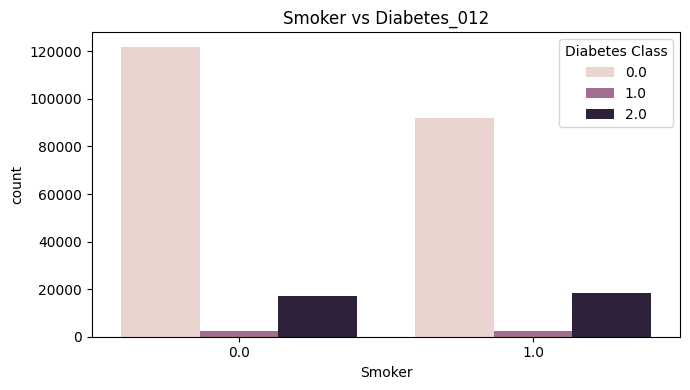

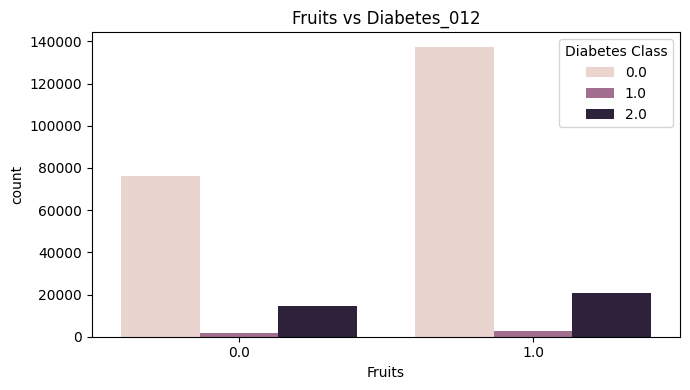

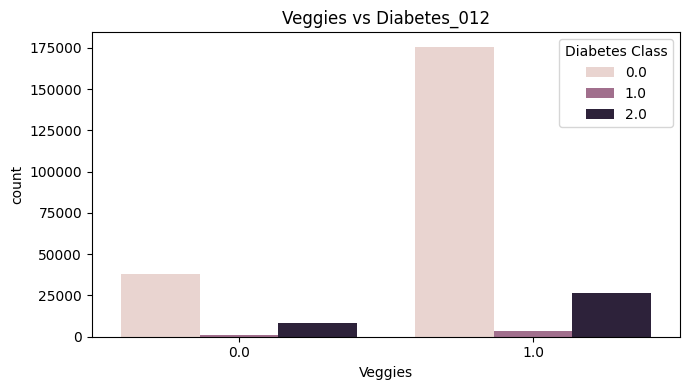

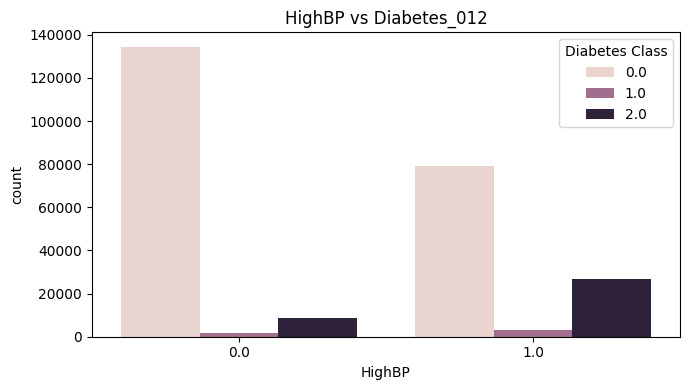

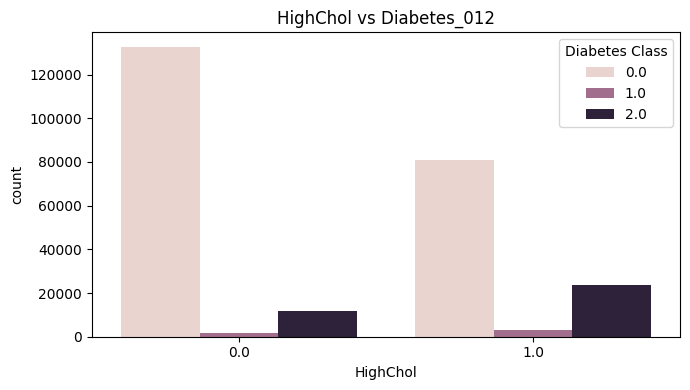

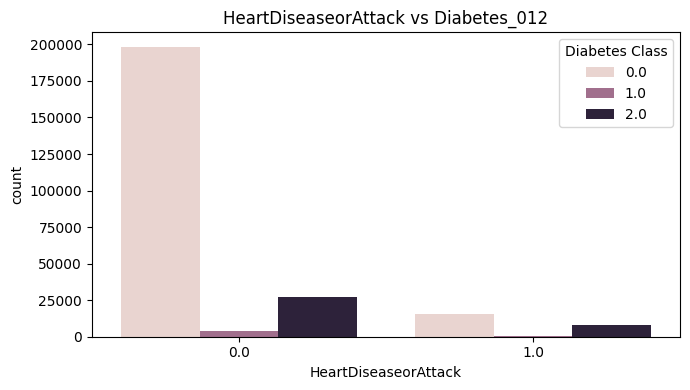

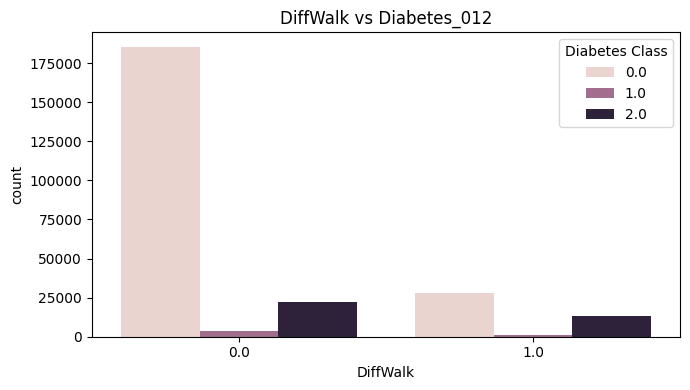

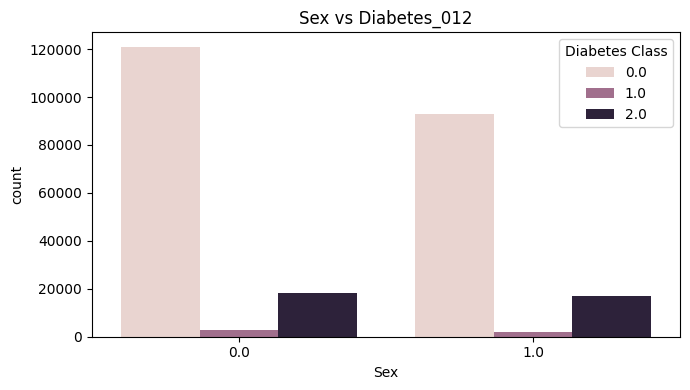

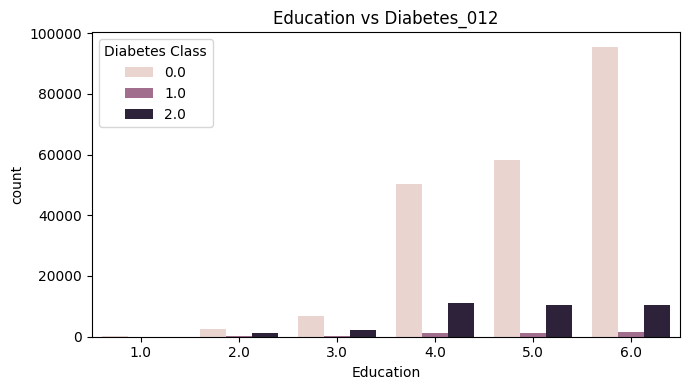

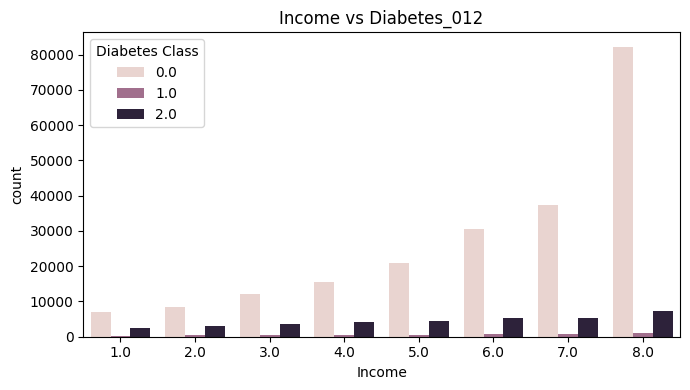

In [28]:
# List of selected categorical features (coded numerically)
categorical_features = [
    'GenHlth',           # 1 (Excellent) to 5 (Poor)
    'PhysActivity',      # 0 = No, 1 = Yes
    'Smoker',            # 0 = No, 1 = Yes
    'Fruits',            # 0 = No, 1 = Yes
    'Veggies',           # 0 = No, 1 = Yes
    'HighBP',            # 0 = No, 1 = Yes
    'HighChol',          # 0 = No, 1 = Yes
    'HeartDiseaseorAttack',
    'DiffWalk',          # 0 = No, 1 = Yes
    'Sex',               # 0 = Female, 1 = Male
    'Education',         # 1–6 levels
    'Income'             # 1–8 levels
]

# Create count plots for each categorical feature by Diabetes_012 target
for feature in categorical_features:
    plt.figure(figsize=(7,4))
    sns.countplot(x=feature, hue='Diabetes_012', data=df)
    plt.title(f'{feature} vs Diabetes_012')
    plt.legend(title='Diabetes Class')
    plt.tight_layout()
    plt.show()

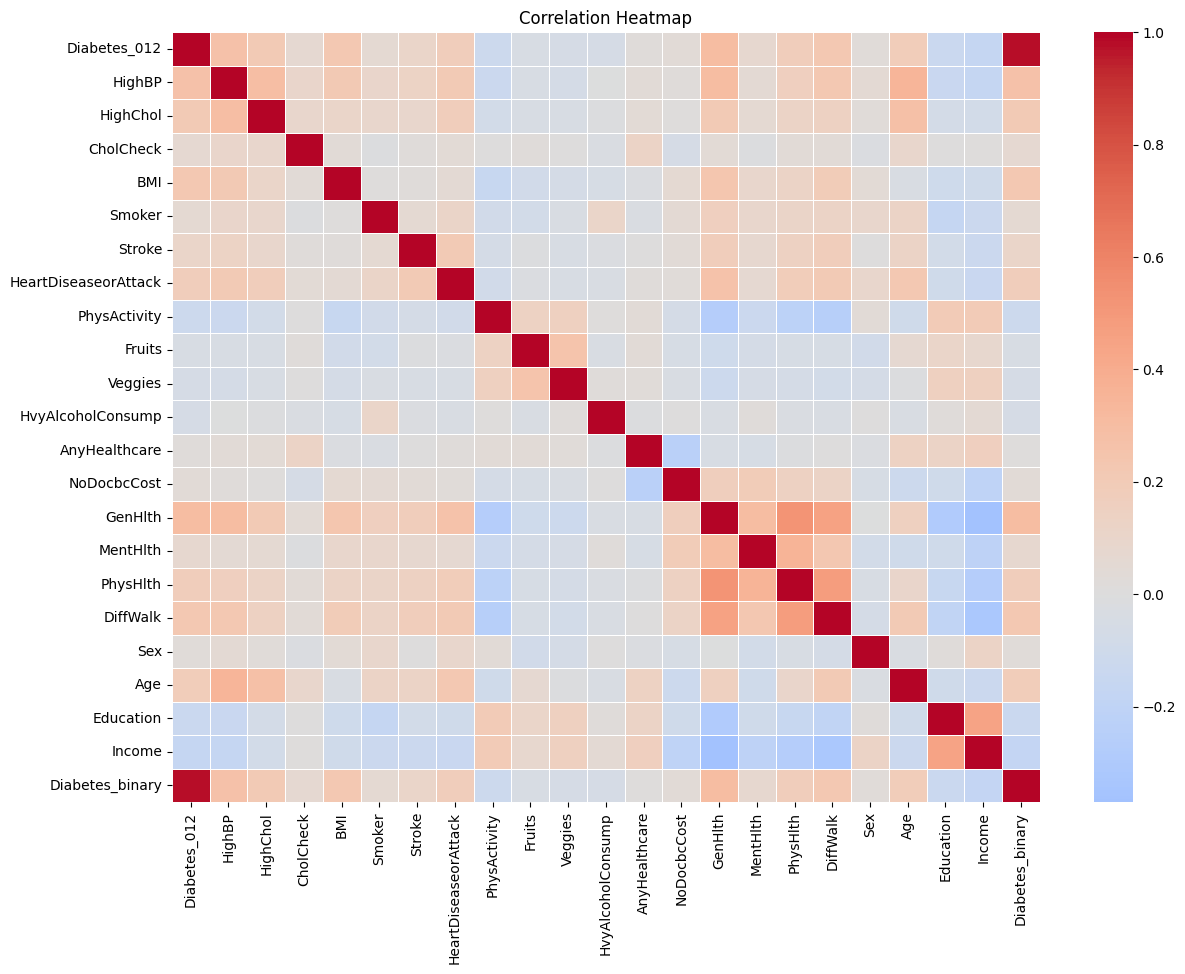

In [29]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Visualize with a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### 🧰 5. EDA Summary & Preprocessing Plan

Q: What are your 3–5 biggest takeaways from EDA?  
A:  
1. Strong Class Imbalance in Target (Diabetes)
2. Health Conditions like High blood pressure (HighBP), High cholesterol (HighChol) have a pattern of indicating diabetes
3. Some Features Are Highly Correlated, like Physicial Health & Gen Health & Difficult Walking

Q: Which features will you scale, encode, or exclude in preprocessing?  
A:  Encode Diabetes_012, exclude irrelevant indicators and pick one of the highly correlapted pairs 

Q: What does your cleaned dataset look like (rows, columns, shape)?  
A:  Diabetes_012 with encoders, with only high=potential indicators as independent variables.

---